### Pandas Visualization

First import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# see the pre-defined styles provided.
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [31]:
# let's generate dataset using pandas
np.random.seed(123)
df = pd.DataFrame({'A': np.random.randn(1095).cumsum(0), 
                   'B': np.random.randn(1095).cumsum(0) + 20,
                   'C': np.random.randn(1095).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2015', periods=1095))
df.head()

,A,B,C
2015-01-01,-1.085631,18.274110,-17.738213
2015-01-02,-0.088285,18.885348,-16.612773
2015-01-03,0.194693,20.194699,-16.553387
2015-01-04,-1.311601,20.890578,-13.966378
2015-01-05,-1.890202,21.210887,-14.602749


<IPython.core.display.Javascript object>


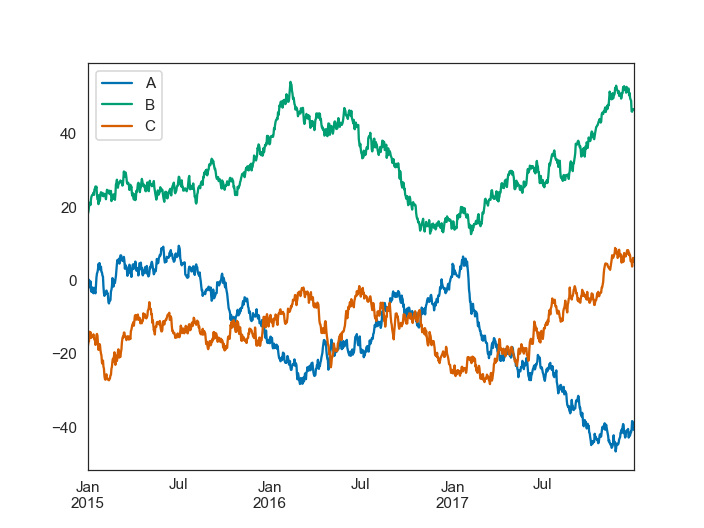

In [54]:
df.plot(); 

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


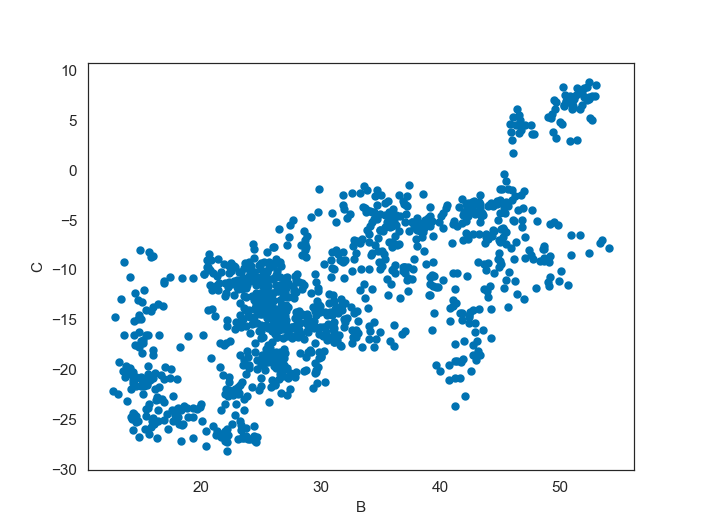

In [66]:
df.plot('B','C', kind = 'scatter');

<IPython.core.display.Javascript object>


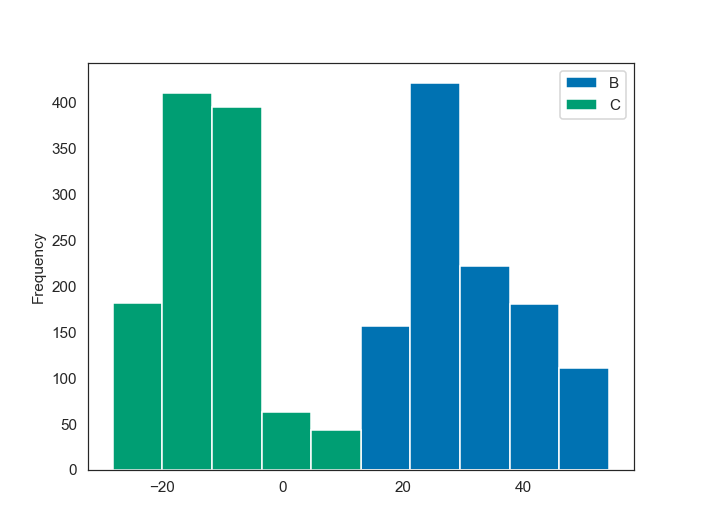

In [69]:
df.plot('A', kind = 'hist');

<IPython.core.display.Javascript object>


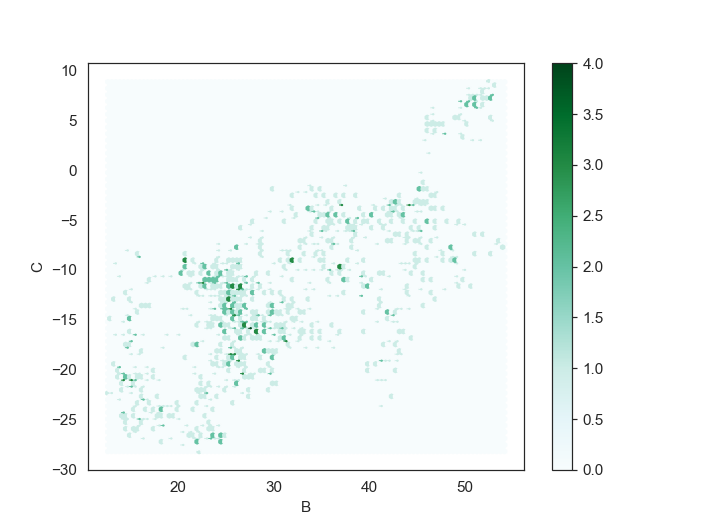

In [72]:
df.plot('B','C', kind = 'hexbin');

<IPython.core.display.Javascript object>


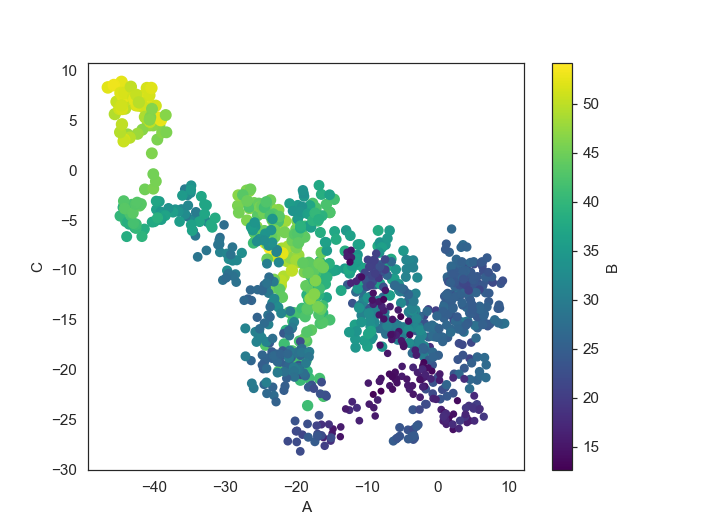

In [75]:
# changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


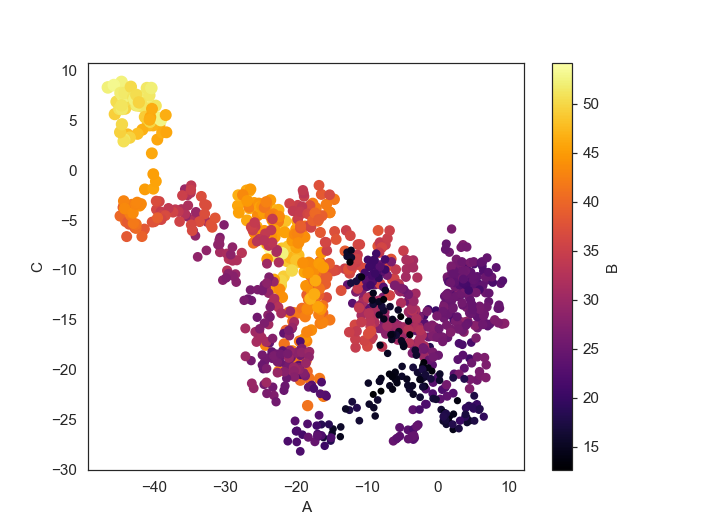

In [81]:
# changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='inferno')

<IPython.core.display.Javascript object>


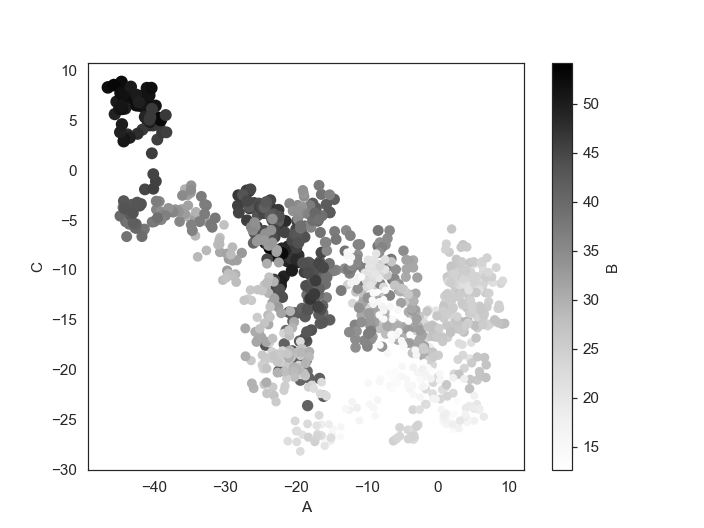

In [82]:
# changing color (c) and size (s) based on column 'B'
#    colormap = {'viridis', 'plasma', 'inferno', 'magma', 'cividis'}
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='')

<IPython.core.display.Javascript object>


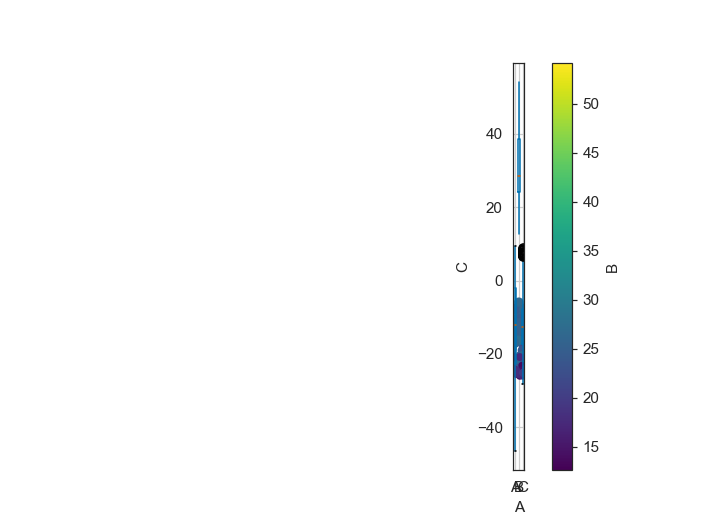

In [83]:
# another method
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


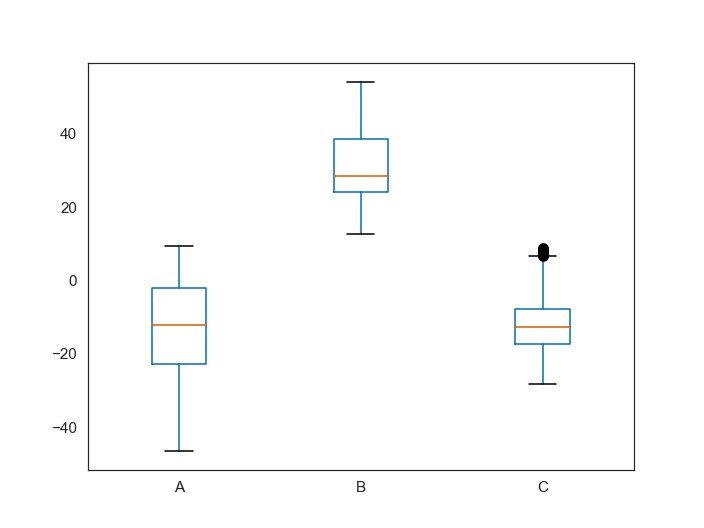

In [85]:
df.plot.box();

<IPython.core.display.Javascript object>


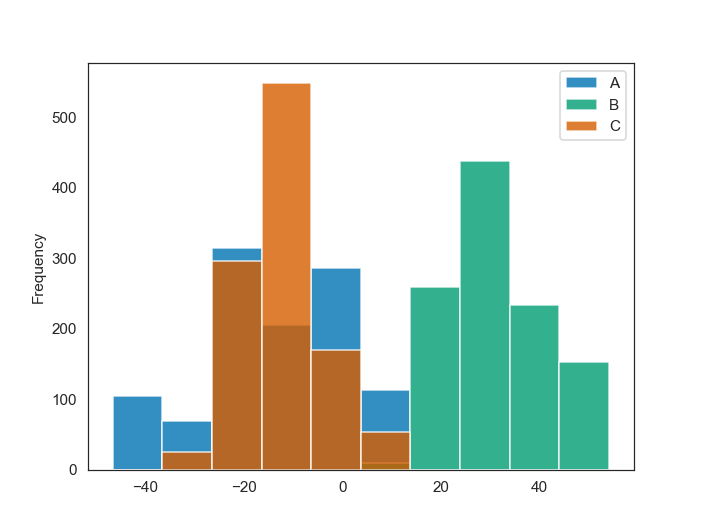

In [86]:
df.plot.hist(alpha=0.8);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


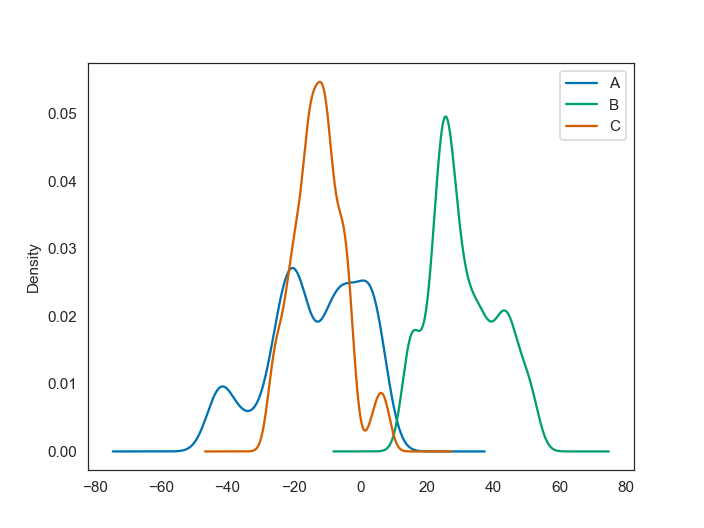

In [87]:
df.plot.kde();

#### pandas.tools.plotting

In [89]:
## Using the Iris flower dataset
iris = pd.read_csv('iris.csv')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [90]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<IPython.core.display.Javascript object>


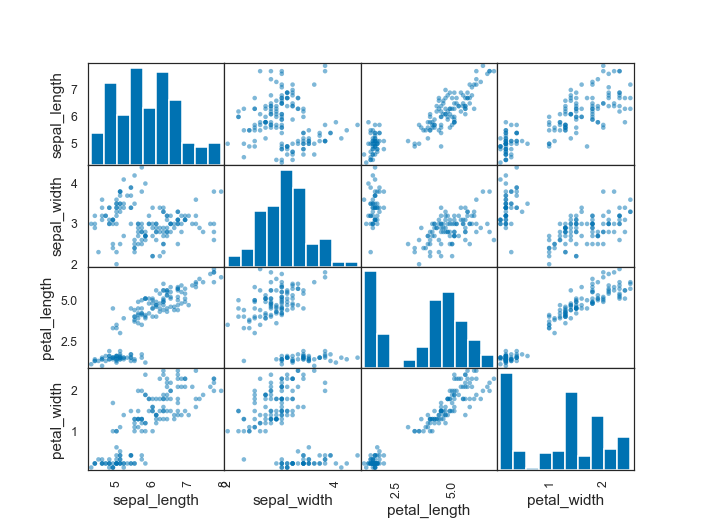

In [93]:
# autocorrelation_plot
from pandas.plotting import autocorrelation_plot

pd.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


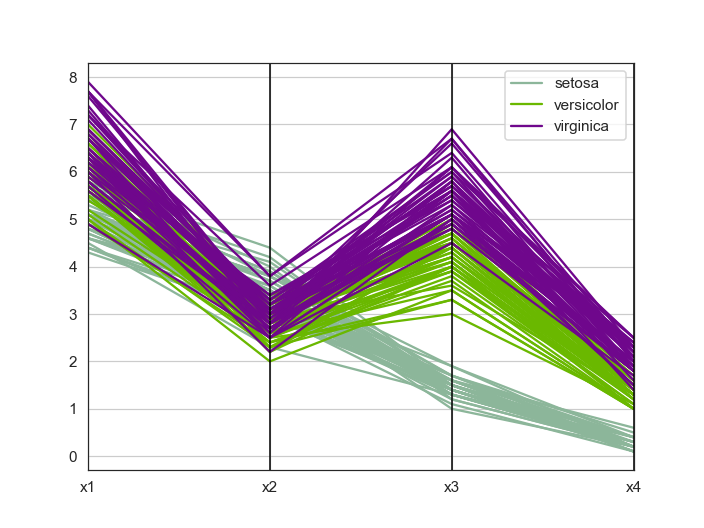

In [94]:
plt.figure()

## .. have to assign the headers explicitly as column names
iris.columns=["x1","x2","x3","x4","Name"]      
pd.plotting.parallel_coordinates(iris, 'Name');

### Seaborn

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [96]:
# let's generate new data points
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


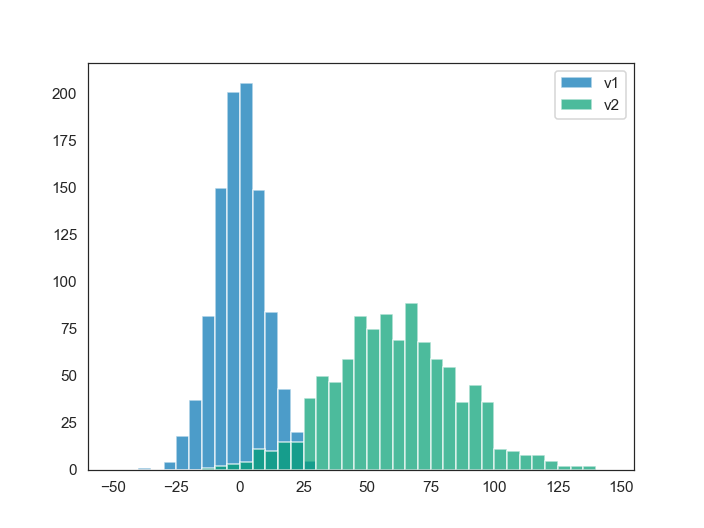

In [97]:
# hist
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


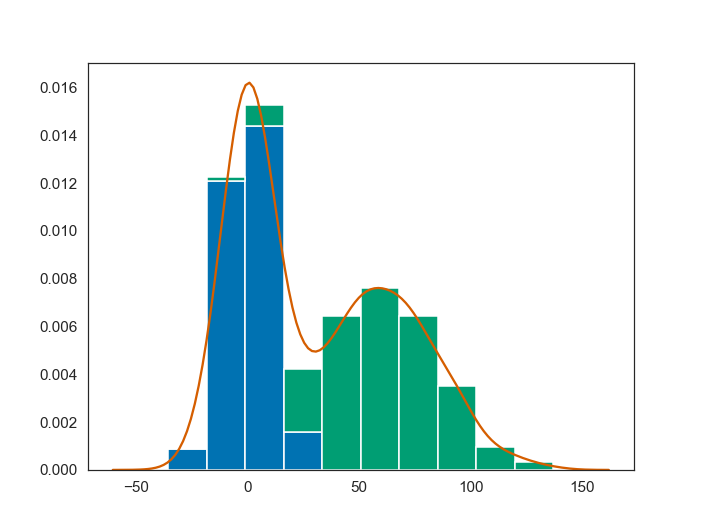

C:\Users\bista\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [98]:
# plot a kernel density estimation over a stacked barchart

plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


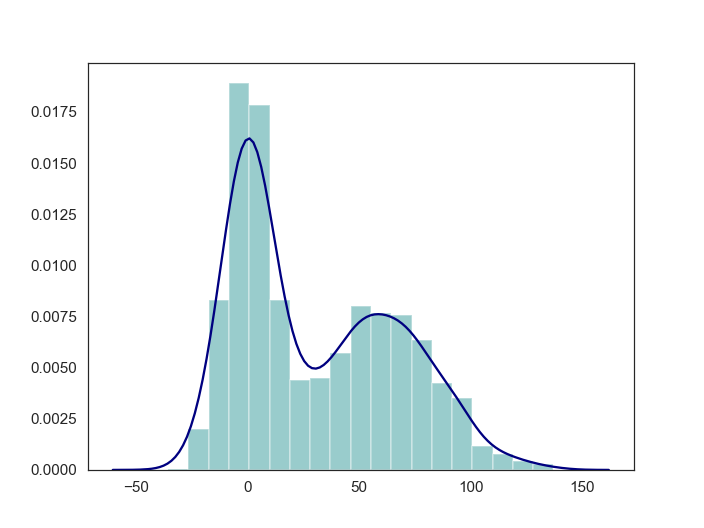

In [103]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


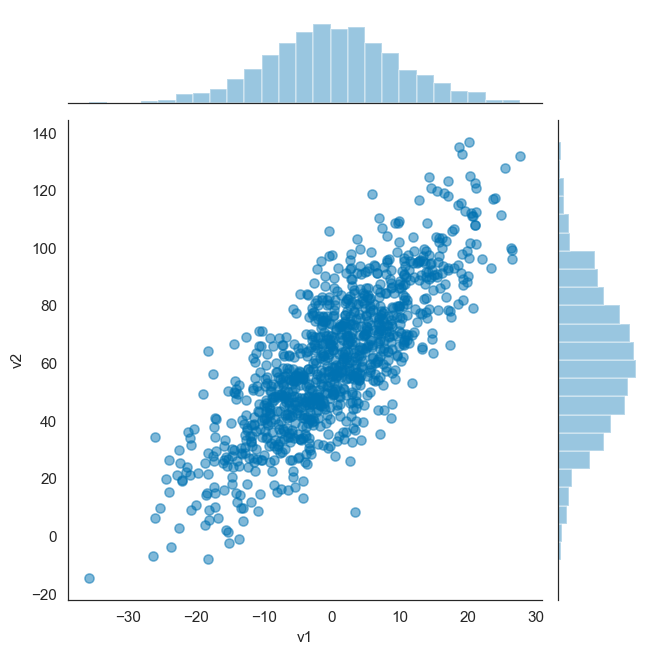

In [109]:
# join-ploting
sns.jointplot(v1, v2, alpha=0.5);

<IPython.core.display.Javascript object>


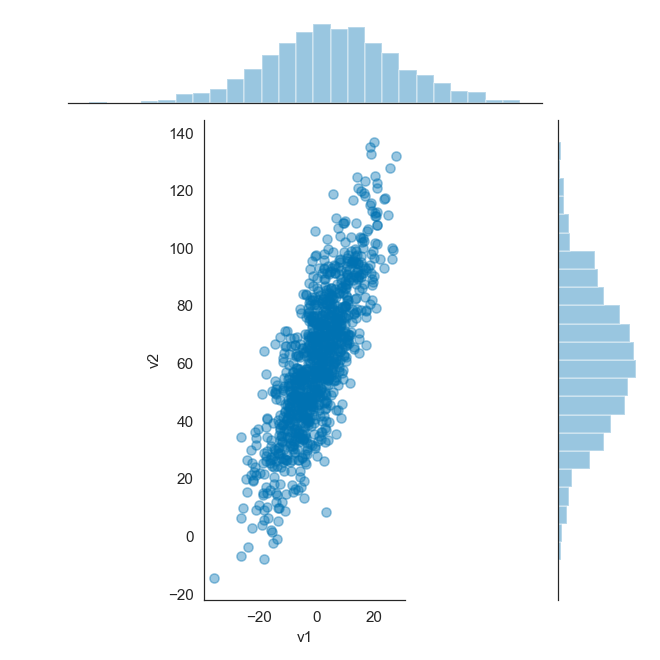

In [112]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


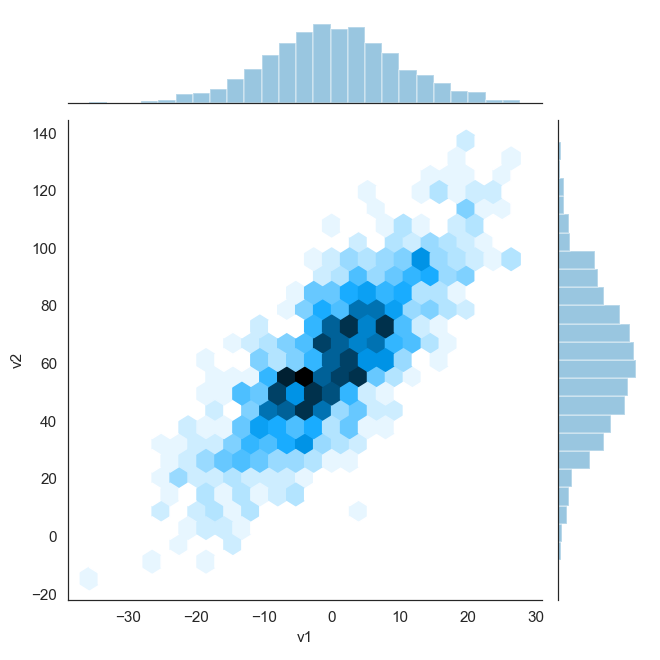

In [113]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


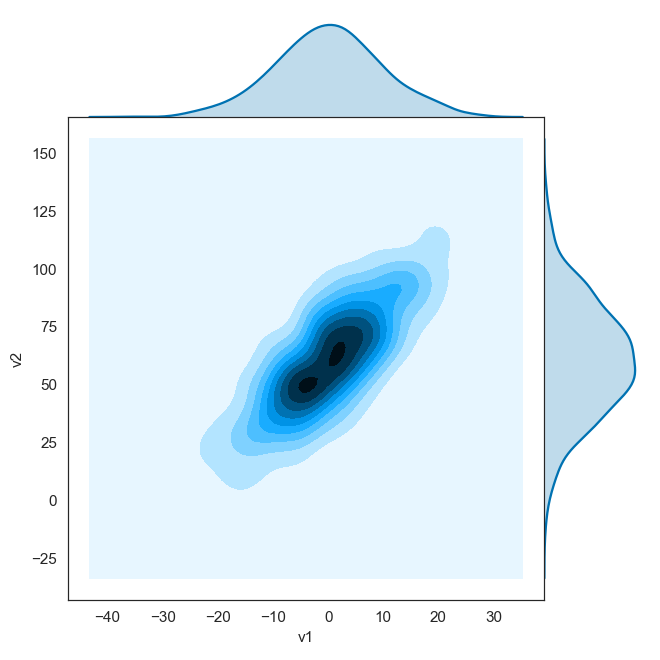

In [114]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

C:\Users\bista\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


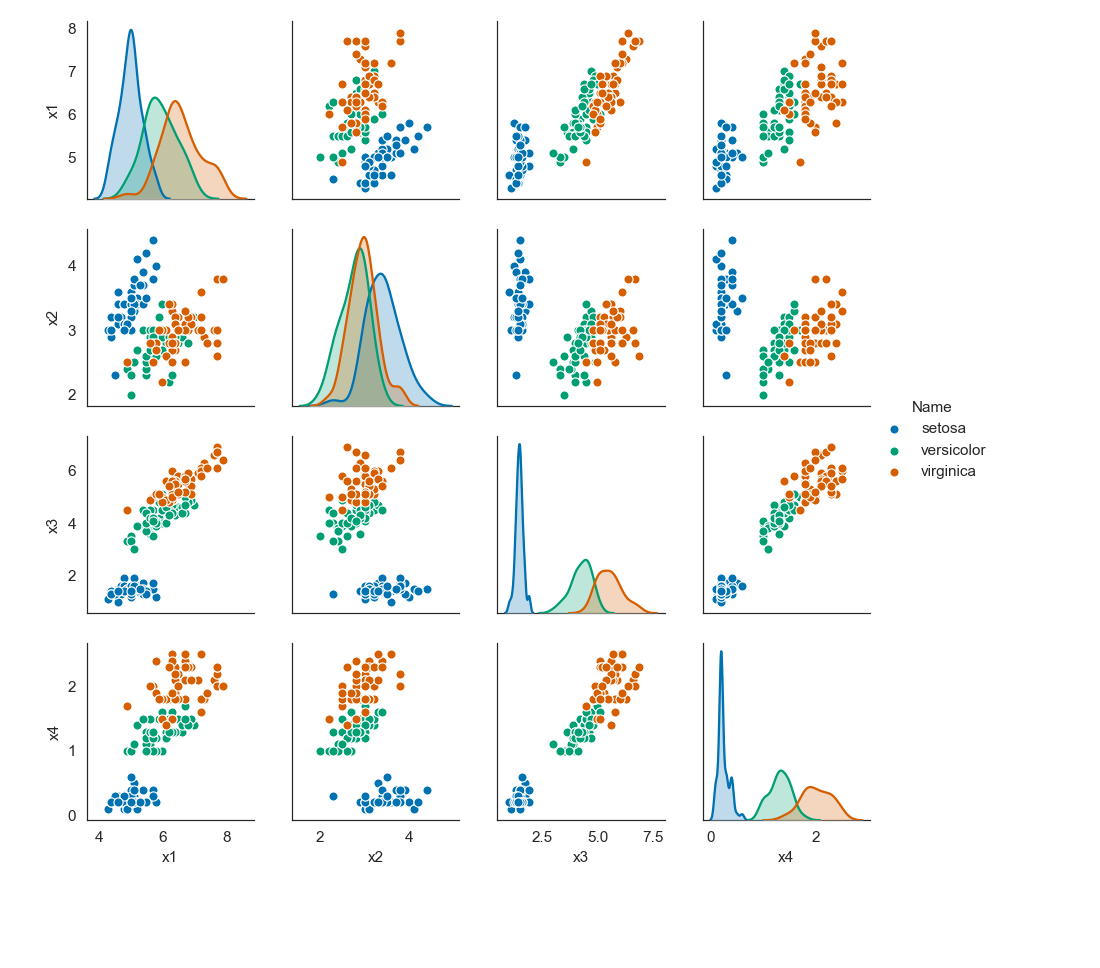

In [116]:
# Iris dataset again
iris.columns=["x1","x2","x3","x4","Name"]      

sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

<IPython.core.display.Javascript object>


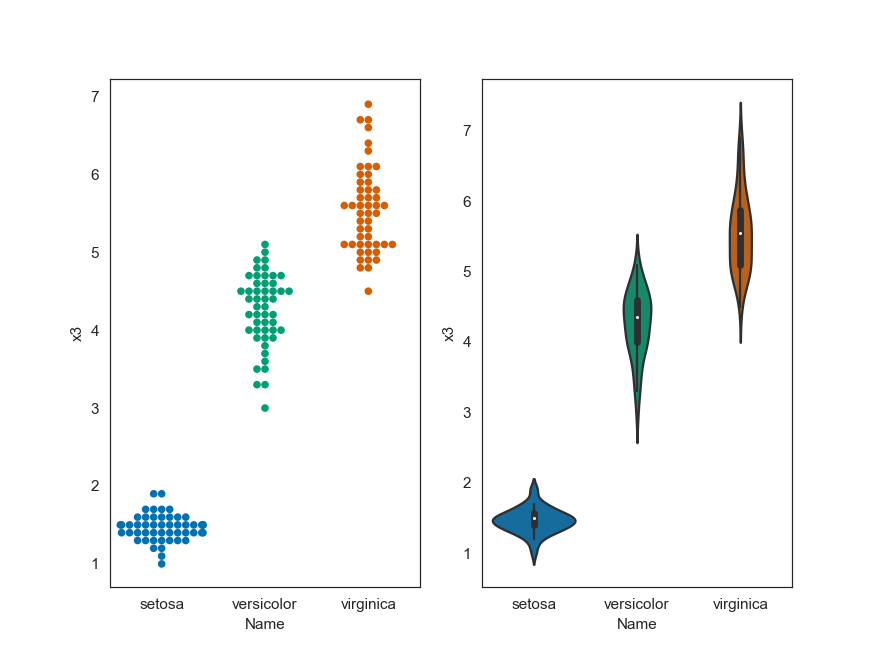

In [117]:
# different style 
iris.columns=["x1","x2","x3","x4","Name"]   

plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'x3', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'x3', data=iris);